In [10]:
import generaluse as gu

import os
import pandas as pd
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
folder = "batch02"
path_1 = f"rawdata/{folder}"

dictionary = gu.getImgNamesAndPaths(path_1)

list_filenames = list(dictionary.keys())
list_filepaths = [*dictionary.values()]

list_data = []
for name, path in zip(list_filenames,list_filepaths):
    data = dict()
    data["Filename"] = name
    data["Filepath"] = path
    list_data.append(data)

dataframe = pd.DataFrame(data=list_data)
dataframe

,Filename,Filepath
0,Experiment-820--01.jpg,rawdata/batch02/Experiment-820--01.jpg
1,Experiment-820--02.jpg,rawdata/batch02/Experiment-820--02.jpg
2,Experiment-820--09.jpg,rawdata/batch02/Experiment-820--09.jpg
3,Experiment-820--12.jpg,rawdata/batch02/Experiment-820--12.jpg


In [3]:
list_imgs = gu.getImagesFromPathfile(list_filepaths)

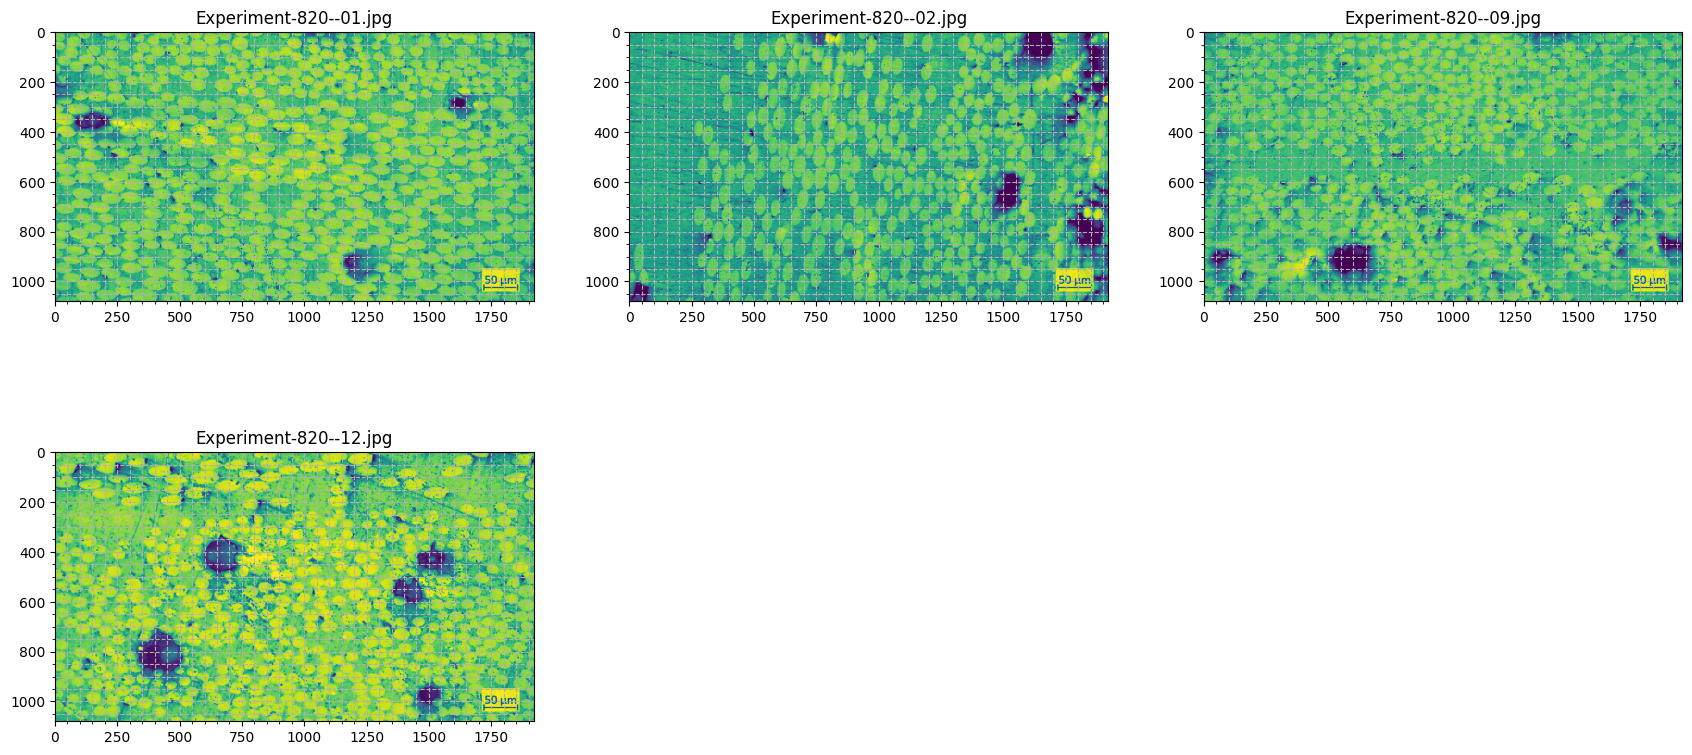

In [14]:
path_2 = f"preprodata/{folder}"

dimension_limits = [[0, 1080]] #eje x

edited_data = [img[dimension_limits[0][0]:dimension_limits[0][1]] for img in list_imgs]
edited_data = [img[:,:,1] for img in edited_data]

clahe = cv2.createCLAHE(clipLimit=2,
	tileGridSize=(10, 10))

edited_data = [clahe.apply(img) for img in edited_data]    

gu.plotFigures(list_filenames,edited_data)

os.makedirs(path_2, exist_ok=True)

In [15]:
for name, img in zip(list_filenames, edited_data):
    cv2.imwrite(os.path.join(path_2, name), img)